## **Rod Cutting Problem**

![Alt text](image-5.png)

### **Rod Cutting Problem: Memoization**

![Alt text](image-22.png)

**So far, NIL = 'No Decision' and W = 'Best Decision is to Waste!'; but for T[3] the best decision is to cut the rod with size '3'(and 'Best Decision' means the the best decision to do right now):**

![Alt text](image-23.png)

**Now to recover the solution we start from the left of the S table:**

![Alt text](image-30.png)

## **Coin Changing Problem**

![Alt text](image-32.png)

**No wastes or over-charges are allowed.**

![Alt text](image-33.png)

**For T=40 cents, here is the following choice paths: a)1 [20 cents]: [T1=40-20 cents] + 1 coin that is already chosen; b)[T1=40-25 cents] + 1 coin that is already chosen; c)[T1=40-5 cents] + 1 coin that is already chosen.**

![Alt text](image-34.png)

![Alt text](image-35.png)

![Alt text](image-36.png)

![](2023-11-28-22-51-38.png)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
lst0 = [1, 4, 7, 9, 16, 43]
x0 = 33

# DP
def minCoins_recursive_1(x, lst):
    if x == 0:
        return 0
    if x < 0:
        return 1000000 # A very large number!
    opts = [ 1 + minCoins_recursive_1(x - ci, lst) for ci in lst ]
    val = min(opts)
    return val

print(minCoins_recursive_1(17, lst0))

# Memoization
def minCoins_memoize_1(x, lst):
    T = [0]*(x+1) # make a list of all zeros of size x + 1
    for i in range(1,x+1):
        opts = [1 + T[i - cj] for cj in lst if (i - cj >= 0)]
        opts.append(10000000) # so that the list is not empty. Or else, the next line will throw an exception
        T[i] = min(opts)
    return T[x]

print(minCoins_memoize_1(17, lst0))

# Memoization with Solution Recovery
def minCoins_1(x, lst):
    T = [0] * (x+1) # memo table
    S = [-1]* (x+1) # best current/immediate decision
    coins_used = []
    for i in range(1,x+1):
        opts = [ (1 + T[i - cj], cj)  for cj in lst if i - cj >= 0]
        opts.append((1000000000, -1)) # Append + infinity to avoid min(..) raising an exception in the next line
        T[i], S[i] = min(opts)
    # NOW RECOVER the list of coins by using the S table.
    value_left = x
    while value_left > 0:
        coins_used.append(S[value_left])# append the immedidate decision
        value_left = value_left - S[value_left] # update the amount left
    assert value_left == 0
    return T[x], coins_used

print(minCoins_1(17, lst0))

2
2
(2, [1, 16])


![](2023-11-28-23-19-48.png)

![](2023-11-29-01-13-58.png)

In [4]:
# DP
def minCoinsRec(lst,x):
    j = len(lst) # the length of the list
    # Base case
    if (x == 0):
        return 0
    elif (j == 0): # List is empty
        return 100000000 # Return a really large number as a place holder for infinity.
    # Otherwise, implement the recursive function

    cj = lst[j-1] # the last element
    lst1 = lst[0:j-1] # all elements of the list but the last one
    pj = int(x/cj) # How many times can coin cj be used
    minValue = 100000000 #Initialize to a very large number
    for i in range(0,pj+1): # Includes both 0 and pj
        v = i + minCoinsRec(lst1, x - i * cj) # Make a recursive call
        if (v < minValue):
            minValue = v
    return minValue # Return the final answer

# Let us try it on the lst0 example above
lst0 = [1, 4, 7, 9, 16, 43]
x0 = 33
j = minCoinsRec(lst0,x0)
print('Minimum number of coins needed for',lst0,'-->', j)
print('==========================---------------------')

# Memoization
def minCoinsBottomUpMemoTable(lst,x):
    n = len(lst)
    # Create a memo table with (x+1) rows and (n+1) columns
    memoTbl =  [ [0 for i in range(0,n+1) ] for j in range(0,x+1) ]
    solutionTbl = [[ -1 for i in range(0,n+1)] for j in range(0,x+1)]
    # No need to fill in the 0s in the table
    for y in range(1,x+1):
        memoTbl[y][0] = 1000000
        for j in range(1,n+1):
            cj = lst[j-1]
            if (y < cj):
                memoTbl[y][j] = memoTbl[y][j-1]
                solutionTbl[y][j] = 0
            else:
                pj = int(y/cj)
                assert(pj > 0)
                minValue= 1000000
                bestOption = -1
                for i in range(0,pj+1):
                    l = i+memoTbl[y-i*cj][j-1]
                    if (l < minValue):
                        minValue = l
                        bestOption = i
                #Update memo table and solution tables
                memoTbl[y][j] = minValue
                solutionTbl[y][j] = bestOption
    # Done
    print('Minimum number of coins needed:', memoTbl[x][n])
    # Extracting solution
    j = n
    y = x
    while (y > 0 and j >= 0):
        k = solutionTbl[y][j]
        print('Coin:', lst[j-1], ' # Times:', k)
        y = y - k * lst[j-1]
        j = j -1
        
#Let us try it on a larger example, Careful -- this will not terminate anytime soon.
lst1=[1,2,4,8]
x1 = 4196
print(minCoinsBottomUpMemoTable(lst1,x1))   
        

Minimum number of coins needed for [1, 4, 7, 9, 16, 43] --> 3
------------------------------------------------
Minimum number of coins needed: 525
Coin: 8  # Times: 524
Coin: 4  # Times: 1
None


## **Knapsack Problem**

![Alt text](image-42.png)

![Alt text](image-46.png)

**Note: If the weights are fractions, we have to scale them by their greates common multiple to make them whole numbers.**

**Note: We fill the table from left to right and bottom to top, because at any point we depend on points below and to the left.**

**To recover the solution, we will have take (T) or leave(L). Therefore, to reconstruct the solution we start from the top right corner:**

![Alt text](image-51.png)

![Alt text](image-52.png)

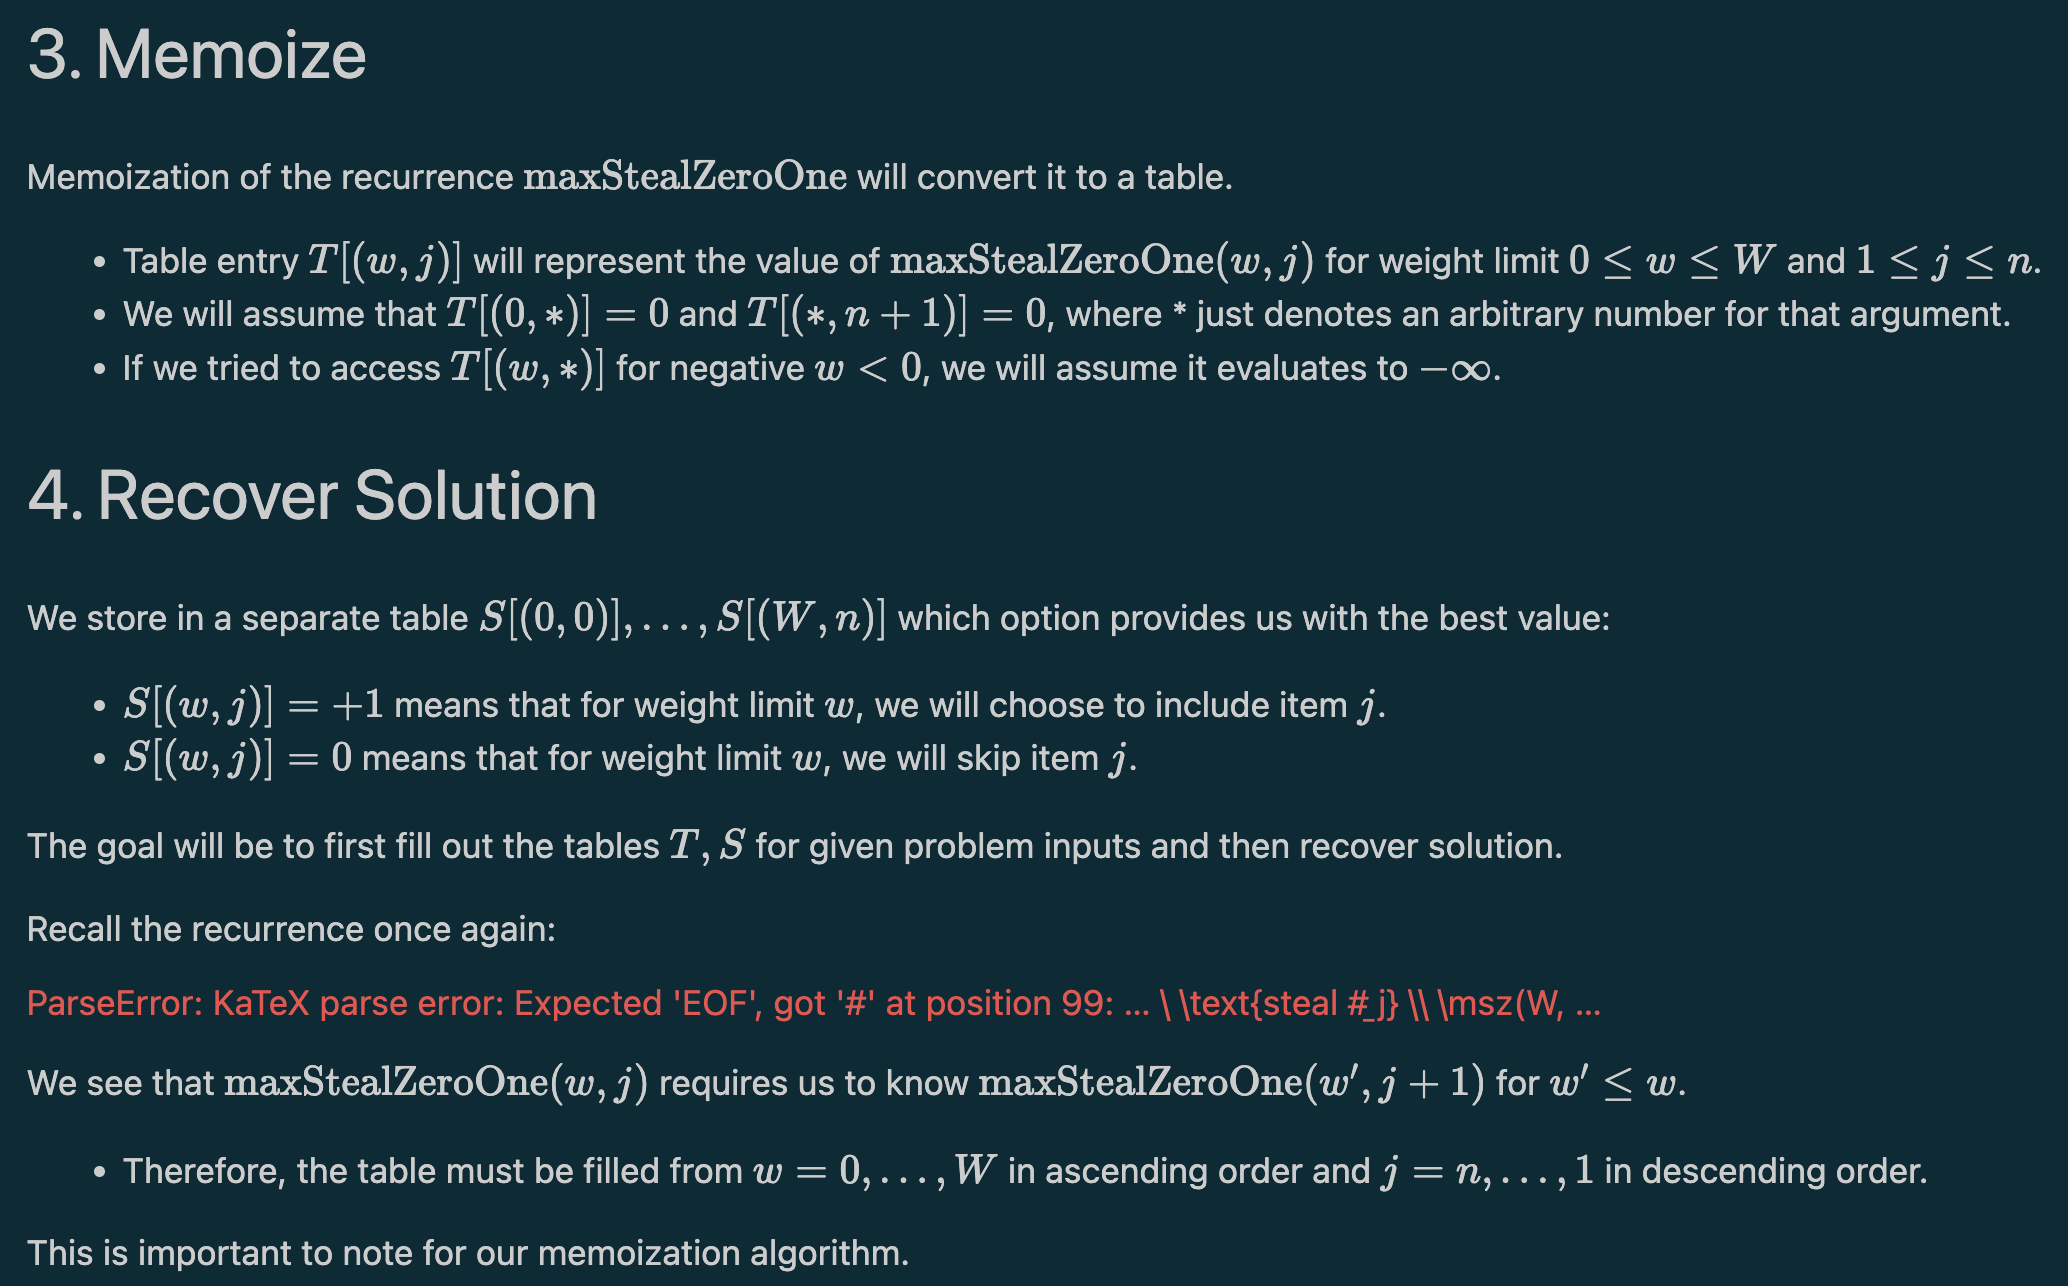

In [6]:
# Important, Run this cell below
W = 200 # weight limit is 200
weights = [1, 5, 20, 35, 90] # These are the weights of individual items
values = [15, 14.5, 19.2, 19.8, 195.2] # These are the values of individual items

# DP
def maxStealZeroOne(W, j, weights, values):
    assert j >= 0
    assert len(weights) == len(values)
    # weights -- list of item weights
    # values -- list of item values
    # W weight limit
    # j item number we are considering.

    # First the base cases
    if W == 0:
        return 0
    if W < 0: # we have added more items to knapsack than its original capacity
        return -float('inf')
    if j >= len(weights):
        return 0
    # Next, handle the recurrence.
    return max(
        values[j] + maxStealZeroOne(W - weights[j], j+1, weights, values),  # steal item j
        maxStealZeroOne(W, j+1, weights, values)# skip item j
               )

print(maxStealZeroOne(W, 0, weights, values))
print('------------------------------------')

    
# Memoization
def memoizedMaxStealZeroOne(W, weights, values):
    n = len(weights)
    assert (len(values) == n), 'Weights and Values list must be of same size'
    assert (W >= 0)
    if W == 0:
        return 0, []# nothing to steal and 0 value derived.

    # Initialize the memo table as a list of lists
    # fill in all entries with a zero
    T = [ [0 for j in range(n)] for w in range(W+1)]
    S = [ [0 for j in range(n)] for w in range(W+1)]

    # we will use this helper method to access our memo table.
    # it will save us a lot of code later.
    def getTblEntry(w, j):
        if w == 0:
            return 0
        if w < 0:
            return -float('inf')
        if j >= n:
            return 0
        return T[w][j]

    for w in range(1, W+1): # w in ascending order from 1 to W.
        for j in range(n-1, -1, -1):  # this is a descending order loop from n-1 to 0.
            # this allows us to simultaneously fill T, S without using if-then-else loop
            (T[w][j], S[w][j]) = max(
                (values[j] + getTblEntry(w - weights[j], j+1), 1),
                (getTblEntry(w, j+1), 0))
    itemsToSteal = []
    # recover solution
    weightOfKnapsack = W
    for j in range(n):
        if (S[weightOfKnapsack][j] == 1):
            itemsToSteal.append(j)
            weightOfKnapsack = weightOfKnapsack - weights[j]
            print(f'Steal Item {j}: Weight = {weights[j]}, Value = {values[j]}')
    print(f'Total weight stolen: {W - weightOfKnapsack}, value = {T[W][0]}')
    return (T[W][0], itemsToSteal) 

print(memoizedMaxStealZeroOne(W, weights, values))   

263.7
------------------------------------
Steal Item 0: Weight = 1, Value = 15
Steal Item 1: Weight = 5, Value = 14.5
Steal Item 2: Weight = 20, Value = 19.2
Steal Item 3: Weight = 35, Value = 19.8
Steal Item 4: Weight = 90, Value = 195.2
Total weight stolen: 151, value = 263.7
(263.7, [0, 1, 2, 3, 4])


![](2023-11-30-12-30-02.png)

![](2023-11-30-12-31-33.png)

In [8]:
W = 25
weights = [1, 5, 20, 35, 90]
values = [15, 14.5, 19.2, 19.8, 195.2]

# DP
def maxSteal(W, weights, values):
    if W == 0:
        return 0
    if W < 0:
        return -float('inf')
    k = len(weights)
    assert len(values) == k
    opts = [ values[i] + maxSteal(W - weights[i], weights, values) for i in range(k) ]
    return max(opts)

print(maxSteal(25, weights, values))
print('==========================')


# Memoization

def maxSteal_memo(W, weights, values):
    # Initialize the tables
    T = [0]* (W+1)
    S = [-1]* (W+1)
    k = len(weights)
    assert len(values) == k
    for w in range(1, W+1):
        opts =  [  ( (values[i]+ T[ w - weights[i] ]), i )  for i in range(k) if w - weights[i] >= 0 ]
        opts.append( (-float('inf'), -1) ) # In case opts was empty from the previous step.
        T[w], S[w] = max(opts)
    # This finishes the computation
    stolen_item_ids = []
    weight_remaining = W
    while weight_remaining >= 0:
        item_id = S[weight_remaining]
        if item_id >= 0:
            stolen_item_ids.append('Steal Item ID %d: weight = %d, value = %f' % (item_id, weights[item_id], values[item_id]) )
            weight_remaining = weight_remaining - weights[item_id]
        else:
            break
    return T[W], stolen_item_ids

W = 25
print(maxSteal_memo(W, weights, values))
print('---------------------------')
W= 200
print(maxSteal_memo(W, weights, values))

375
(375, ['Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 15.000000', 'Steal Item ID 0: weight = 1, value = 1

## **Dynamic Programming: Longest Common Subsequence**

![Alt text](image-68.png)

### **Memoization**

![Alt text](image-71.png)

### **Solution Recovery**

![Alt text](image-73.png)

![](2023-11-30-14-01-05.png)

In [11]:
# DP
def lcs(s1, s2, i, j):
    assert 0 <= i and i <= len(s1)
    assert 0 <= j and j <= len(s2)
    if i == len(s1):
        return 0
    if j == len(s2):
        return 0
    if s1[i] == s2[j]:
        return 1 + lcs(s1, s2, i+1, j+1)
    else:
        return max(lcs(s1, s2, i+1, j), lcs(s1, s2, i, j+1))
    
s1 = "GATTACA"
s2 = "ACTGATAACAA"
print(lcs(s1, s2, 0, 0))
print('===========================')

# Memoization
def memoize_lcs(s1, s2):
    m = len(s1)
    n = len(s2)
    # let's create a memo table and fill it with zeros. This will nicely take care of the base cases.
    memo_tbl = [ [0 for j in range(n+1)] for i in range(m+1)]
    sol_info = [ ['' for j in range(n+1)] for i in range(m+1)] # This will help us recover solutions
    for i in range(m-1, -1, -1): # iterate from m-1 to 0 with a step of -1
        for j in range(n-1, -1, -1):
            if s1[i] == s2[j]:
                memo_tbl[i][j] = memo_tbl[i+1][j+1] + 1
                sol_info[i][j] = 'match'
            else:
                # Python allows us to compare and assign tuples
                # This nifty bit of code saves us an if then else condition and assignments
                # if you are new to python feel free to write out the logic carefully
                memo_tbl[i][j], sol_info[i][j] = max((memo_tbl[i+1][j],'right'), (memo_tbl[i][j+1], 'down'))
    # Now let us recover the longest common sub sequence
    lcs = '' # initialize it to empty string
    match_locations = [] # matches of (i,j)
    i = 0
    j = 0 # start at top left corner
    while (i < m and j < n):
        if sol_info[i][j] == 'match':
            assert s1[i] == s2[j]
            lcs = lcs + s1[i]
            match_locations.append((i,j))
            i,j = i + 1, j + 1
        elif sol_info[i][j] == 'right':
            i, j = i+1, j
        else:
            assert sol_info[i][j] == 'down'
            i, j = i, j+1
    return lcs, match_locations

#slightly longer strings will run instantaneously given that we are memoizing
s1 = "GGATTACACATTACCTATAGGTATAAT"
s2 = "GGATTTATCTATAAATTACCTATTTATTATATTACCGTATGGTATGC"
(lcs, match_locations) = memoize_lcs(s1, s2)
print(f'Longest common subsequence: {lcs} length= {len(lcs)}')
print('Matches:')
print('\t Char:\t i, j')
for (i, j) in match_locations:
    print(f'\t {s1[i]}:\t {i}, {j}')    

6
Longest common subsequence: GGATTACAATTACCTATATATAAT length= 24
Matches:
	 Char:	 i, j
	 G:	 0, 0
	 G:	 1, 1
	 A:	 2, 2
	 T:	 3, 3
	 T:	 4, 4
	 A:	 5, 6
	 C:	 6, 8
	 A:	 7, 10
	 A:	 9, 12
	 T:	 10, 15
	 T:	 11, 16
	 A:	 12, 17
	 C:	 13, 18
	 C:	 14, 19
	 T:	 15, 20
	 A:	 16, 21
	 T:	 17, 22
	 A:	 18, 25
	 T:	 21, 26
	 A:	 22, 28
	 T:	 23, 29
	 A:	 24, 30
	 A:	 25, 33
	 T:	 26, 37
